# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 4 </span>

In questa esercitazione viene simulato, attraverso la <b>Dinamica Molecolare</b> (MD), il comportamento di un sistema di particelle ad energia fissata che interagiscono tramite un potenziale di tipo Lennard-Jones. Le simulazioni vengono eseguite su un campione di <b>Argon</b> ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni termodinamiche:

- <span><b>Fase solida</b>: $\rho^*=1.1$, $T^*=0.8$,  $r_c^*=2.2$</span>
- <span><b>Fase liquida</b>: $\rho^*=0.8$, $T^*=1.1$,  $r_c^*=2.5$</span>
- <span><b>Fase gassosa</b>: $\rho^*=0.05$, $T^*=1.2$,  $r_c^*=5.0$</span>

dove il simbolo $^*$ indica le quantità espresse in unità di Lennard-Jones.

### Esercizio 4.1

In questo esercizio vengono apportate delle modifiche al codice di Dinamica Molecolare fornitoci in laboratorio. La versione iniziale del codice utilizza l'<b>algoritmo di Verlet</b> leggendo la configurazione iniziale delle particelle salvata nel file <i>config.0</i> e le caratteristiche del campione dal file <i>input.dat</i>. L'algoritmo calcola le nuove posizioni delle particelle tramite la relazione

$$\vec r(t+dt) \simeq 2\vec r(t) - \vec r(t-dt) + dt^2 \vec a(t)$$

Siccome abbiamo bisogno di due configurazioni spaziali per iniziare la simulazione, sfruttando la relazione $<v> = \sqrt{3T}$, vengono generate casualmente delle velocità che rispecchiano la temperatura richiesta e, a partire da queste, si calcola la configurazione precedente a quella iniziale. Terminata la simulazione viene stampata la configurazione finale nel file <i>config.final</i>. <br>
Andiamo ora a migliorare il codice aggiungendo la possibilità di eseguire una <b>ripartenza</b>, ovvero di iniziare la simulazione avendo già a disposizione le due configurazioni ai tempi $t$ e $t-dt$. Oltre alla configurazione finale, viene quindi salvata anche la penultima configurazione nel file <i>old.final</i>, che poi sarà copiata in <i>old.0</i> prima di cominciare la simulazione. Per fare in modo che venga raggiunta la temperatura desiderata si riscalano le velocità dal confronto tra la temperatura del sistema e quella target sfruttando la relazione citata sopra (terminata la fase di equilibrazione il riscalamento non sarà più effettuato). Inoltre, è stata introdotta nel file di input una nuova variabile <b>restart</b> per poter scegliere tra le due possibilità di simulazione:
- <span><b>restart = 0</b>: la simulazione comincia avendo solamente la configurazione iniziale (partenza). Questa modalità viene utilizzata solamente nella prima simulazione. </span>
- <span><b>restart = 1</b>: la simulazione comincia avendo la configurazione attuale e quella precedente (ripartenza). Questa modalità viene utilizzata dalla seconda simulazione in avanti. </span>

Siamo ora pronti a partire con la simulazione. La prima fase è l'<b>equilibrazione</b> del sistema: vengono eseguite diverse ripartenze finchè la temperatura richiesta non viene raggiunta. Per tutte e tre le fasi la configurazione di partenza è quella di un reticolo fcc, contenuta nel file <i>config.fcc</i>. <br>
In ogni simulazione vengono eseguiti $10^4$ step di integrazione e vengono misurate temperatura, energia cinetica, energia potenziale ed energia totale ogni $10$ step, a causa delle forti correlazioni tra le configurazioni generate dall'algoritmo di Verlet. Di seguito riportiamo gli andamenti di tali quantità misurate durante l'equilibrazione. <br>
Al termine della fase di termalizzazione sono state salvate nelle cartelle contenenti i dati sull'equilibrazione le due configurazioni finali a partire dalle quali verrano successivamente eseguite le vere e proprie simulazioni. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
from scipy.constants import physical_constants

%config InlineBackend.figure_format = 'retina'

# ARGON
sigma = 0.34e-9
e_kb = 120
e = e_kb * const.k # fattore di conversione per energia
m = 39.948 #amu

<b>Fase solida</b>

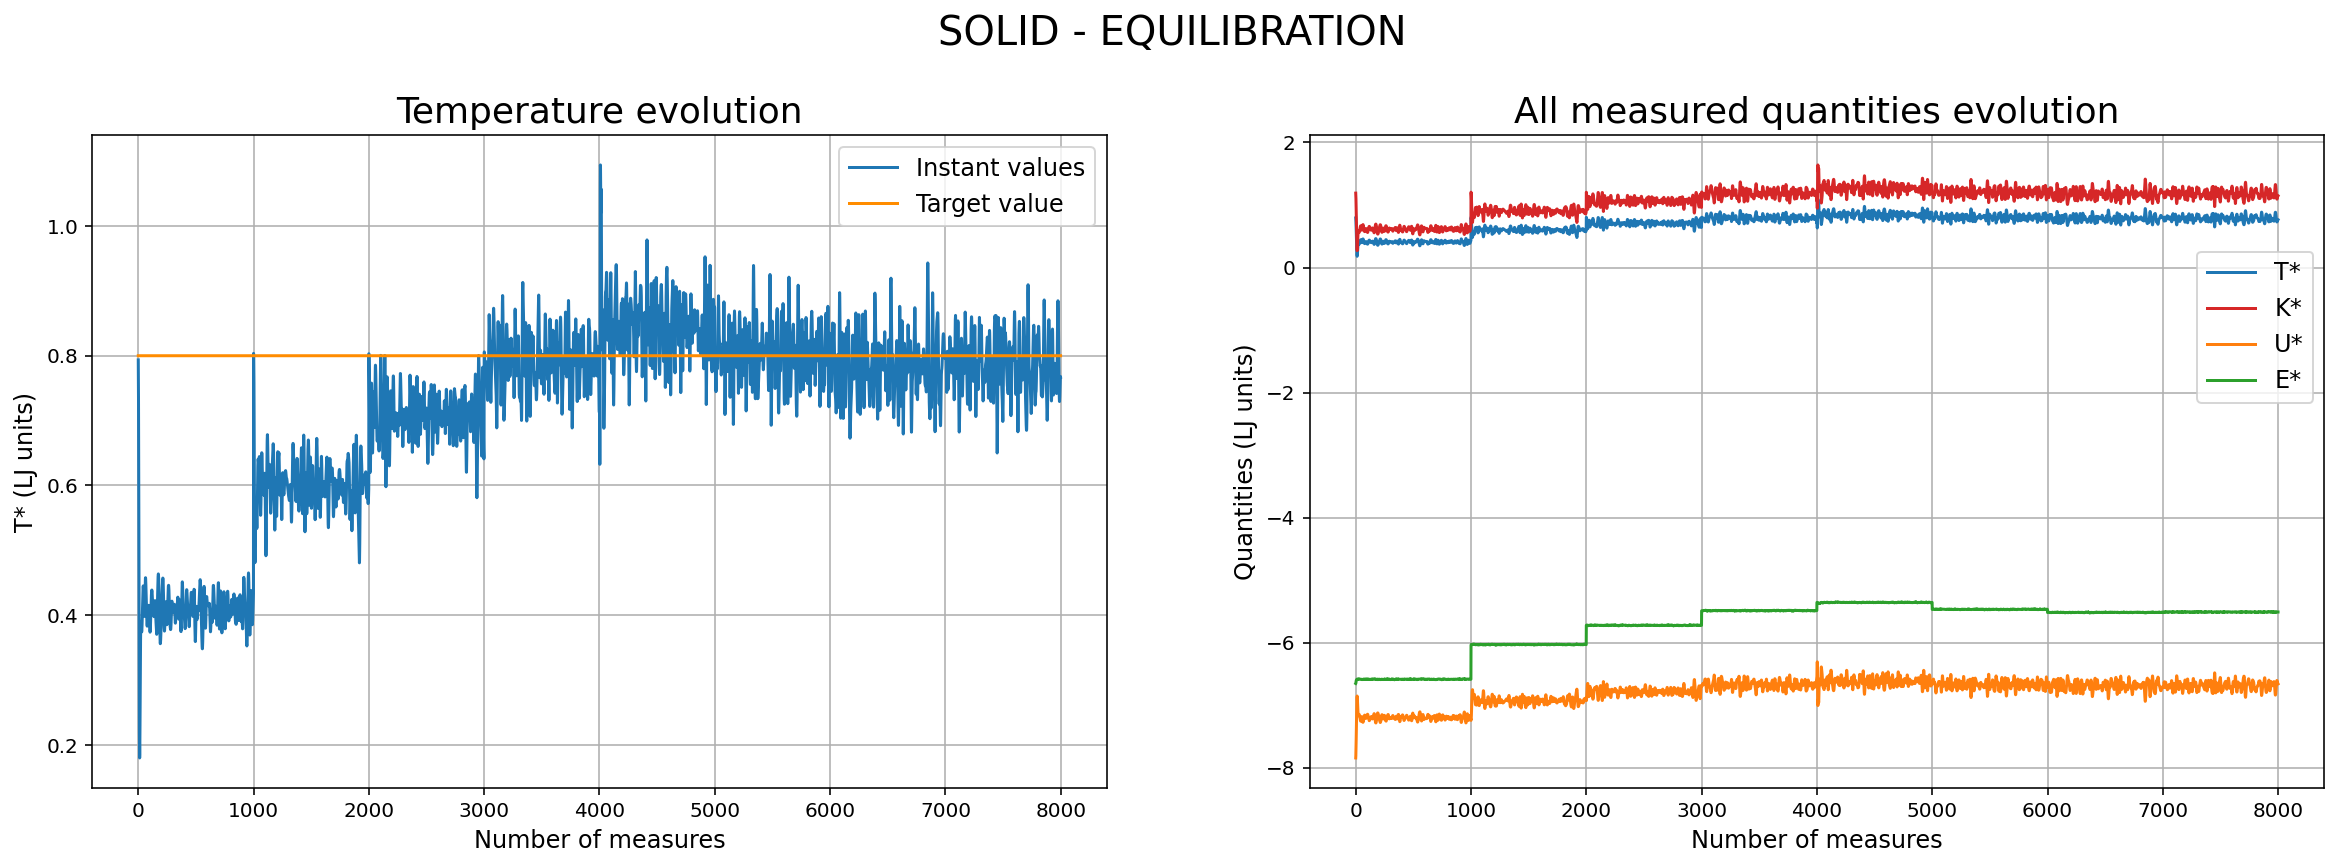

In [2]:
solid_eq_temp = np.loadtxt("MD/solid_eq/output_temp.dat")
solid_eq_ekin = np.loadtxt("MD/solid_eq/output_ekin.dat")
solid_eq_epot = np.loadtxt("MD/solid_eq/output_epot.dat")
solid_eq_etot = np.loadtxt("MD/solid_eq/output_etot.dat")

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.reshape(-1)
fig.suptitle(f'SOLID - EQUILIBRATION', fontsize=20, y=1.02)

ax[1].plot(solid_eq_temp, label="T*", color='tab:blue')
ax[1].plot(solid_eq_ekin, label="K*", color='tab:red')
ax[1].plot(solid_eq_epot, label="U*", color='tab:orange')
ax[1].plot(solid_eq_etot, label="E*", color='tab:green')
ax[1].set_xlabel('Number of measures', fontsize=12)
ax[1].set_ylabel('Quantities (LJ units)', fontsize=12)
ax[1].set_title(f'All measured quantities evolution', fontsize=18)
ax[1].legend(loc=(0.875, 0.59), fontsize=12)
ax[1].grid(True)

T = np.ones(solid_eq_temp.size)*0.8
ax[0].plot(solid_eq_temp, label='Instant values', color='tab:blue')
ax[0].plot(T, label='Target value', color='darkorange')
ax[0].set_xlabel('Number of measures', fontsize=12)
ax[0].set_ylabel('T* (LJ units)', fontsize=12)
ax[0].set_title(f'Temperature evolution', fontsize=18)
ax[0].legend(loc='upper right', fontsize=12)
ax[0].grid(True)
plt.show()

Come si può vedere dal grafico a sinistra il sistema ha una temperatura iniziale bassa, ma già alla quarta ripartenza raggiunge la temperatura desiderata, mantenendo delle oscillazioni attorno ad essa di 0.1 unità . Notiamo inoltre un repentino aumento iniziale dell'energia potenziale: infatti, la configurazione iniziale del sistema è quella di un reticolo fcc, che minimizza l'energia potenziale; quest'ultima non può quindi far altro che aumentare. Per conservazione dell'energia totale, l'energia cinetica e anche la temperatura diminuiscono in questa fase iniziale.

<b>Fase liquida</b>

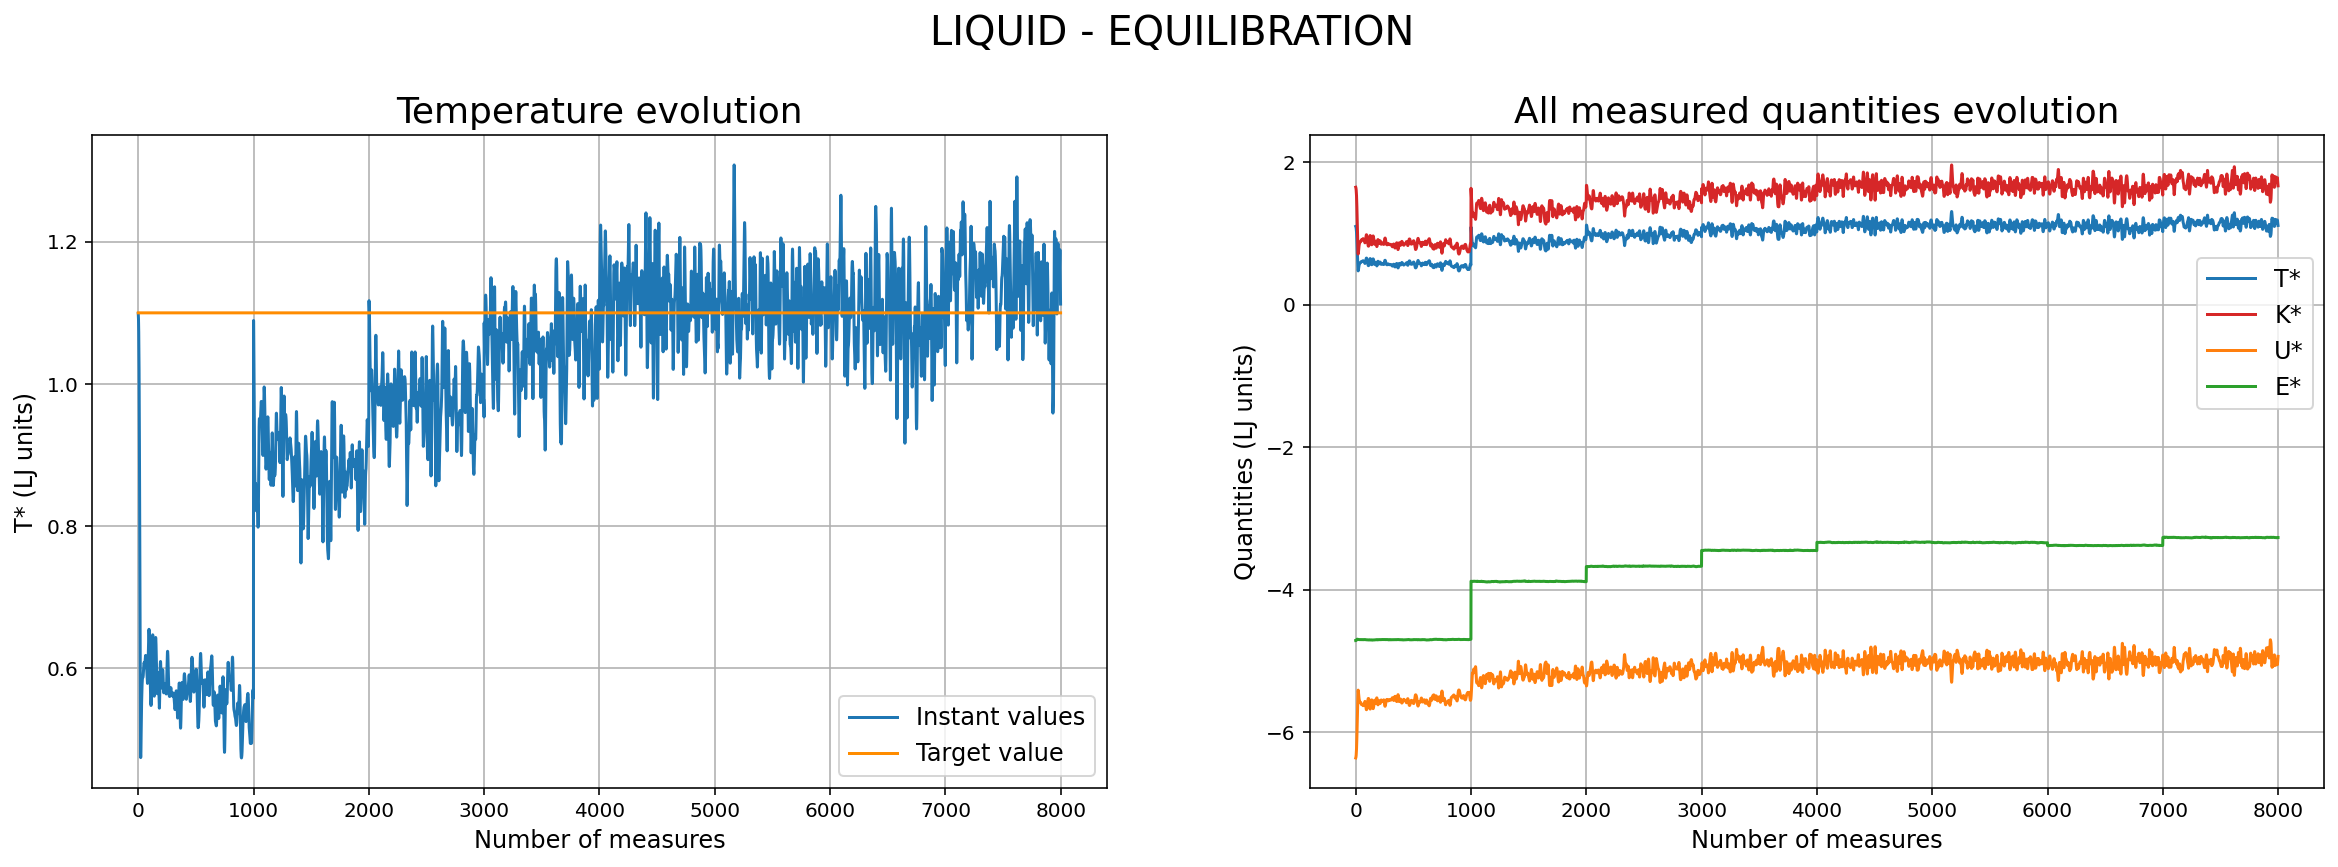

In [3]:
liquid_eq_temp = np.loadtxt("MD/liquid_eq/output_temp.dat")
liquid_eq_ekin = np.loadtxt("MD/liquid_eq/output_ekin.dat")
liquid_eq_epot = np.loadtxt("MD/liquid_eq/output_epot.dat")
liquid_eq_etot = np.loadtxt("MD/liquid_eq/output_etot.dat")

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.reshape(-1)
fig.suptitle(f'LIQUID - EQUILIBRATION', fontsize=20, y=1.02)

ax[1].plot(liquid_eq_temp, label="T*", color='tab:blue')
ax[1].plot(liquid_eq_ekin, label="K*", color='tab:red')
ax[1].plot(liquid_eq_epot, label="U*", color='tab:orange')
ax[1].plot(liquid_eq_etot, label="E*", color='tab:green')
ax[1].set_xlabel('Number of measures', fontsize=12)
ax[1].set_ylabel('Quantities (LJ units)', fontsize=12)
ax[1].set_title(f'All measured quantities evolution', fontsize=18)
ax[1].legend(loc=(0.875, 0.58), fontsize=12)
ax[1].grid(True)

T = np.ones(liquid_eq_temp.size)*1.1
ax[0].plot(liquid_eq_temp, label='Instant values', color='tab:blue')
ax[0].plot(T, label='Target value', color='darkorange')
ax[0].set_xlabel('Number of measures', fontsize=12)
ax[0].set_ylabel('T* (LJ units)', fontsize=12)
ax[0].set_title(f'Temperature evolution', fontsize=18)
ax[0].legend(loc='lower right', fontsize=12)
ax[0].grid(True)
plt.show()

Rispetto alla fase solida, il sistema ha bisogno di una ripartenza in più per raggiungere l'equilibrio. Le oscillazioni attorno alla temperatura target sono in questo caso più ampie, arrivando fino a 0.15 unità.

<b>Fase gassosa</b>

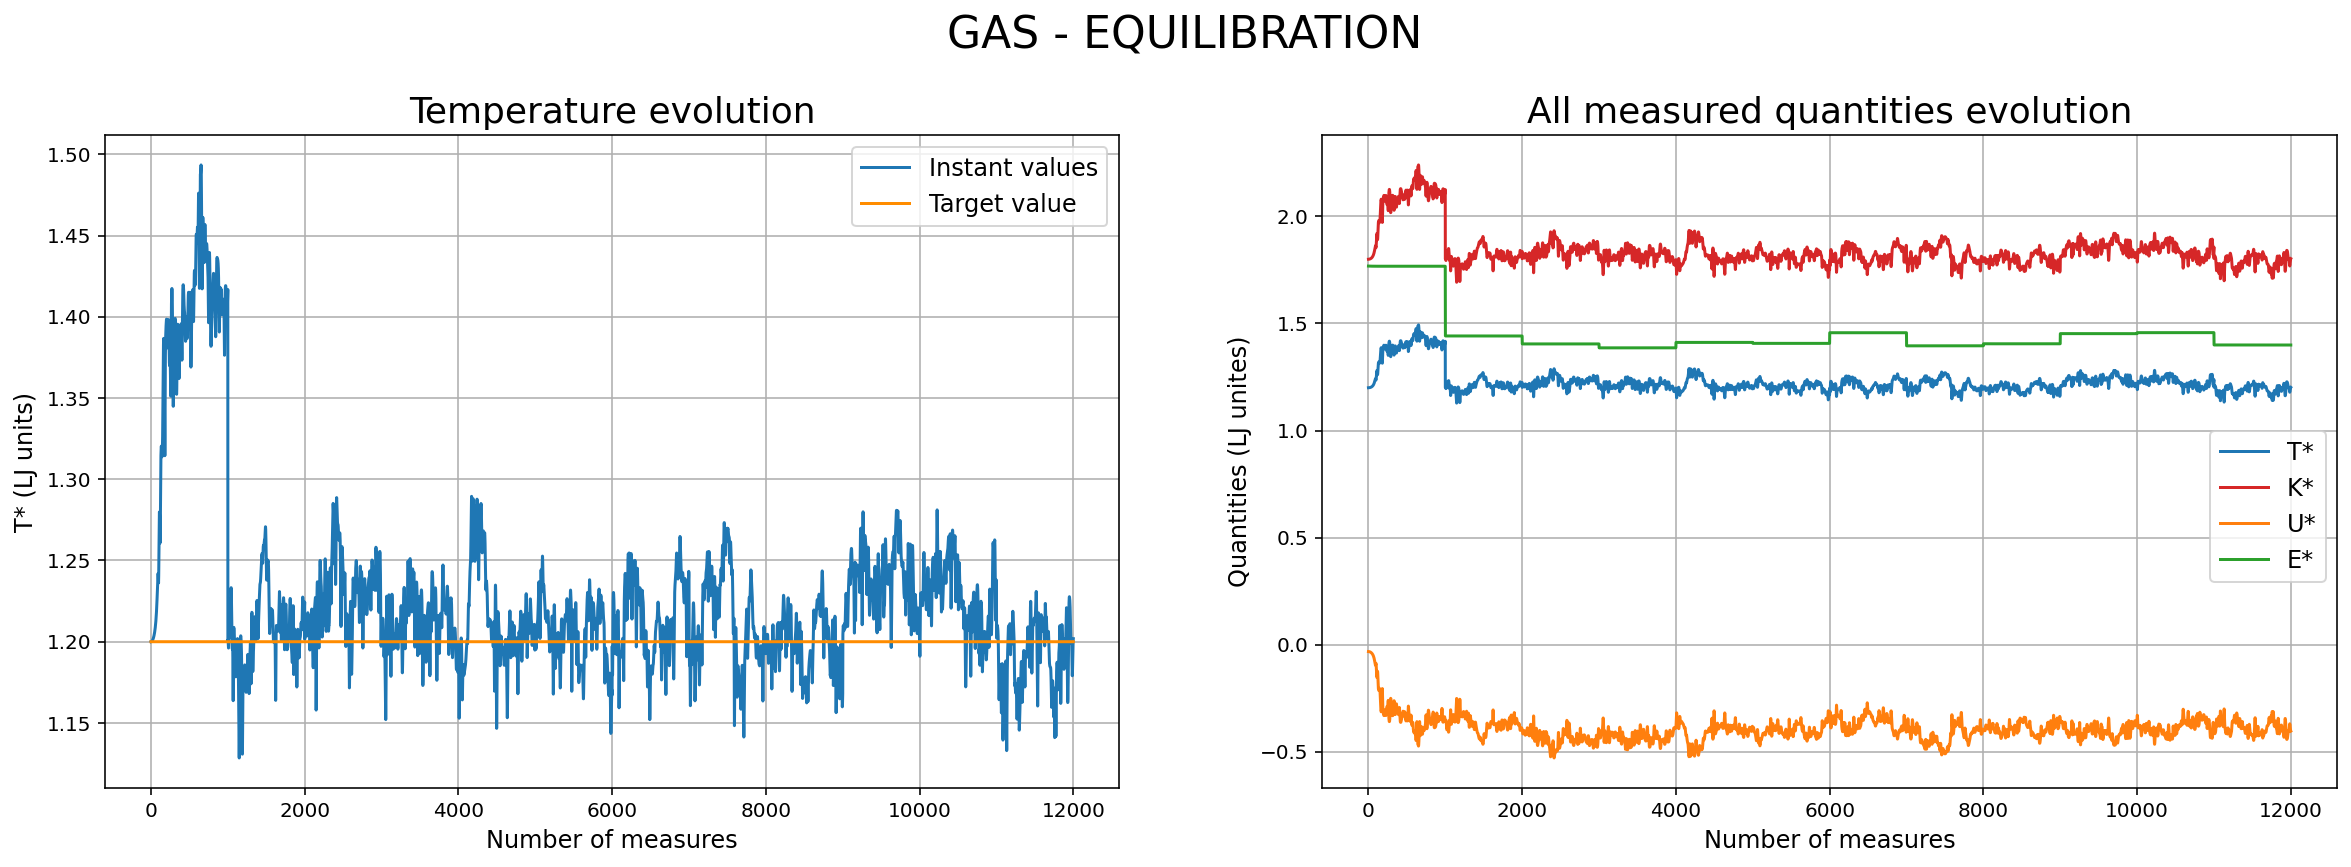

In [4]:
gas_eq_temp = np.loadtxt("MD/gas_eq/output_temp.dat")
gas_eq_ekin = np.loadtxt("MD/gas_eq/output_ekin.dat")
gas_eq_epot = np.loadtxt("MD/gas_eq/output_epot.dat")
gas_eq_etot = np.loadtxt("MD/gas_eq/output_etot.dat")

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle(f'GAS - EQUILIBRATION', fontsize=22, y=1.02)
ax = ax.reshape(-1)

ax[1].plot(gas_eq_temp, label="T*", color='tab:blue')
ax[1].plot(gas_eq_ekin, label="K*", color='tab:red')
ax[1].plot(gas_eq_epot, label="U*", color='tab:orange')
ax[1].plot(gas_eq_etot, label="E*", color='tab:green')
ax[1].set_xlabel('Number of measures', fontsize=12)
ax[1].set_ylabel('Quantities (LJ unites)', fontsize=12)
ax[1].set_title(f'All measured quantities evolution', fontsize=18)
ax[1].legend(loc=(0.875, 0.315), fontsize=12)
ax[1].grid(True)

T = np.ones(gas_eq_temp.size)*1.2
ax[0].plot(gas_eq_temp, label='Instant values', color='tab:blue')
ax[0].plot(T, label='Target value', color='darkorange')
ax[0].set_xlabel('Number of measures', fontsize=12)
ax[0].set_ylabel('T* (LJ units)', fontsize=12)
ax[0].set_title(f'Temperature evolution', fontsize=18)
ax[0].legend(loc='upper right', fontsize=12)
ax[0].grid(True)

plt.show()

Nella fase gassosa la temperatura richiesta viene raggiunta già alla seconda ripartenza. Tuttavia, nonostante le oscillazioni siano sempre contenute entro 0.08 unità intorno al valore 1.2, sono presenti ampie zone in cui la temperatura si trova al di sopra o al di sotto di quella attesa. Anche aumentando il numero di ripartenze la temperatura continua a fluttuare notevolmente. <br>
Osserviamo che in questo caso, contrariamente a quanto accadeva nelle due fasi precedenti, il sistema inizialmente innalza la sua temperatura, diminuendo l'energia potenziale: il parametro di densità del gas infatti è 10 volte inferiore rispetto a quello di solido e liquido, pertanto la configurazione fcc, seppur ordinata, non è più una configurazione che minimizza l'energia potenziale.

### Esercizi 4.2 - 4.3 

Siccome il codice di Dinamica Molecolare permette di stampare su file solamente i valori istantanei di energia totale per particella $E/N$, energia potenziale per particella $V/N$, energia cinetica per particella $K/N$ e temperatura $T$, viene implementato il metodo del data blocking per calcolare valori medi e incertezze delle quantità di interesse. 

A questo punto siamo pronti per procedere con la simulazione: per tutte e tre le fasi vengono eseguiti $10^5$ passi di integrazione divisi in $100$ blocchi, effettuando quindi $10^2$ misure in ogni blocco. Di seguito vengono riportati i grafici con i risultati ottenuti.

<b>Fase solida</b>

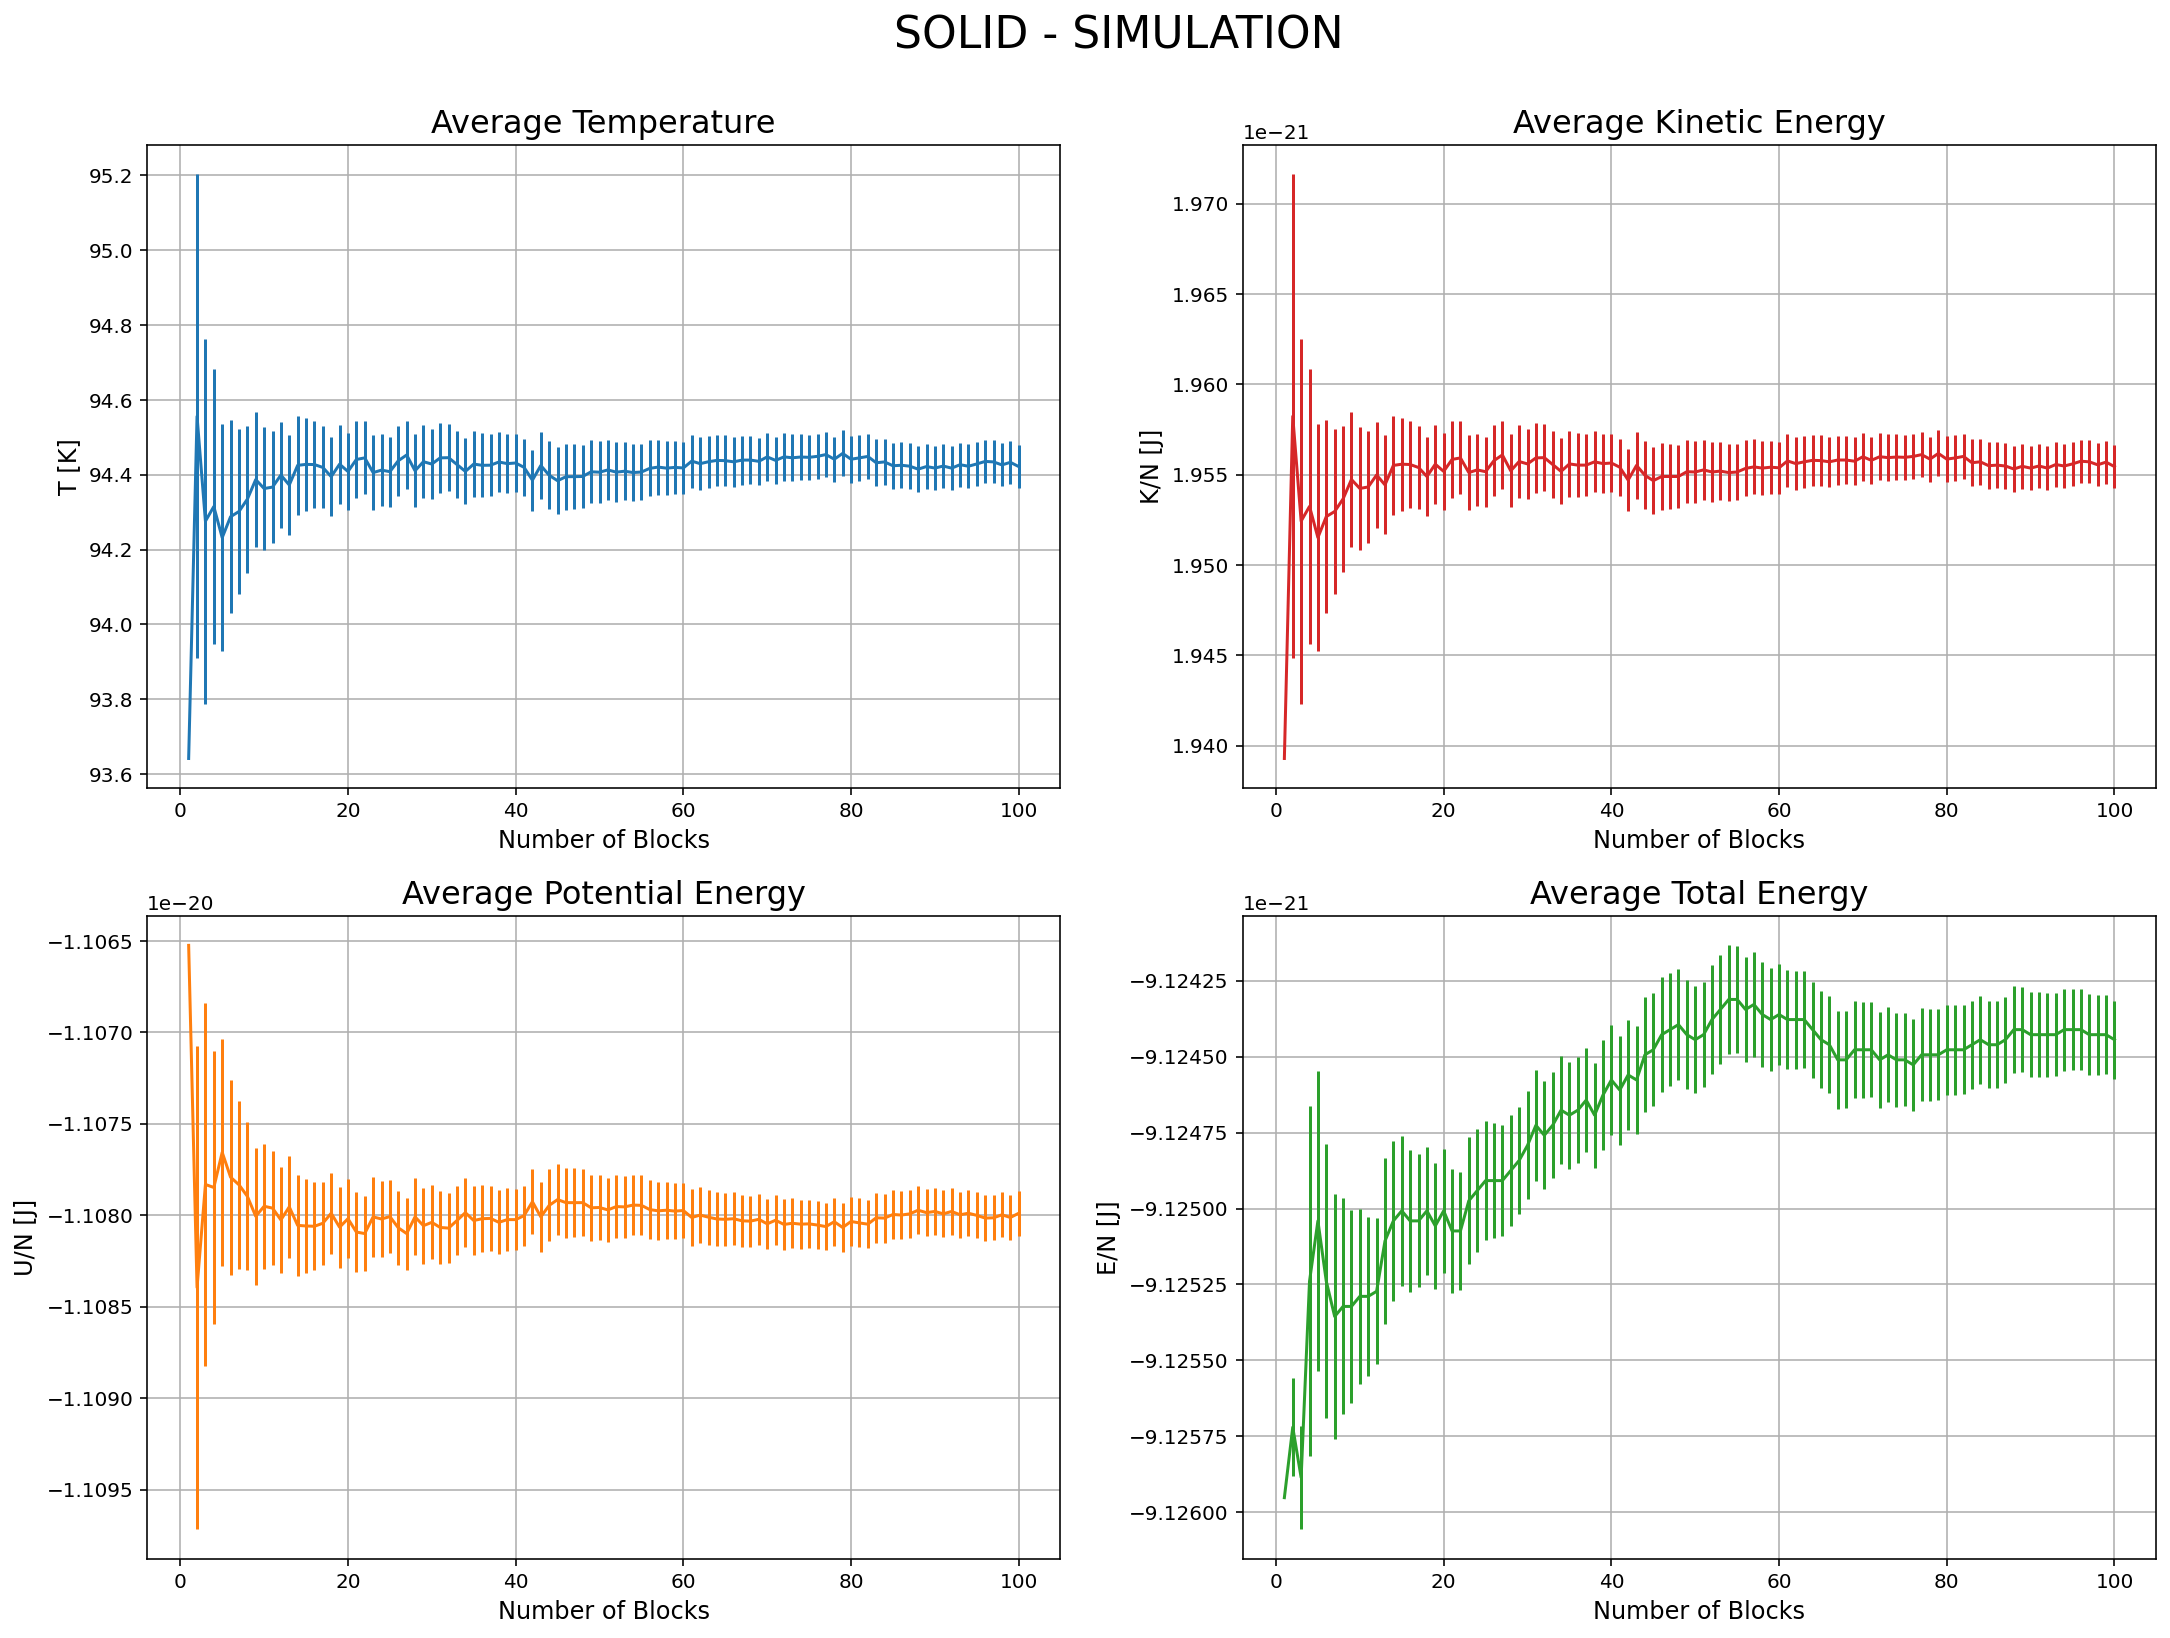

In [5]:
solid_ave_temp, solid_err_temp = np.loadtxt("MD/solid_ave/ave_temp.out", usecols = (1,2), delimiter=' ', unpack ='true')*e_kb
solid_ave_ekin, solid_err_ekin = np.loadtxt("MD/solid_ave/ave_ekin.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
solid_ave_epot, solid_err_epot = np.loadtxt("MD/solid_ave/ave_epot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
solid_ave_etot, solid_err_etot = np.loadtxt("MD/solid_ave/ave_etot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e

block = np.loadtxt("MD/solid_ave/ave_temp.out", usecols = (0))

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f'SOLID - SIMULATION', fontsize=22, y=0.95)
ax = ax.reshape(-1)

ave_list = [solid_ave_temp, solid_ave_ekin, solid_ave_epot, solid_ave_etot]
err_list = [solid_err_temp, solid_err_ekin, solid_err_epot, solid_err_etot]
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
title_list = ['Average Temperature', 'Average Kinetic Energy', 'Average Potential Energy', 'Average Total Energy']
N_list = ['T [K]', 'K/N [J]', 'U/N [J]', 'E/N [J]']

for i in range(4):
    ax[i].errorbar(block, ave_list[i], yerr=err_list[i], color=color_list[i], ecolor=color_list[i])
    ax[i].set_xlabel(r'Number of Blocks', fontsize=12)
    ax[i].set_ylabel(f'{N_list[i]}', fontsize=12)
    ax[i].set_title(f'{title_list[i]}', fontsize=16)
    ax[i].grid(True)

plt.show()

All'aumentare del numero di blocchi le proprietà termodinamiche misurate convergono, stabilizzandosi attorno a un determinato valore. Notiamo che l'energia totale è negativa, infatti si tratta di uno stato legato.

<b>Fase liquida</b>

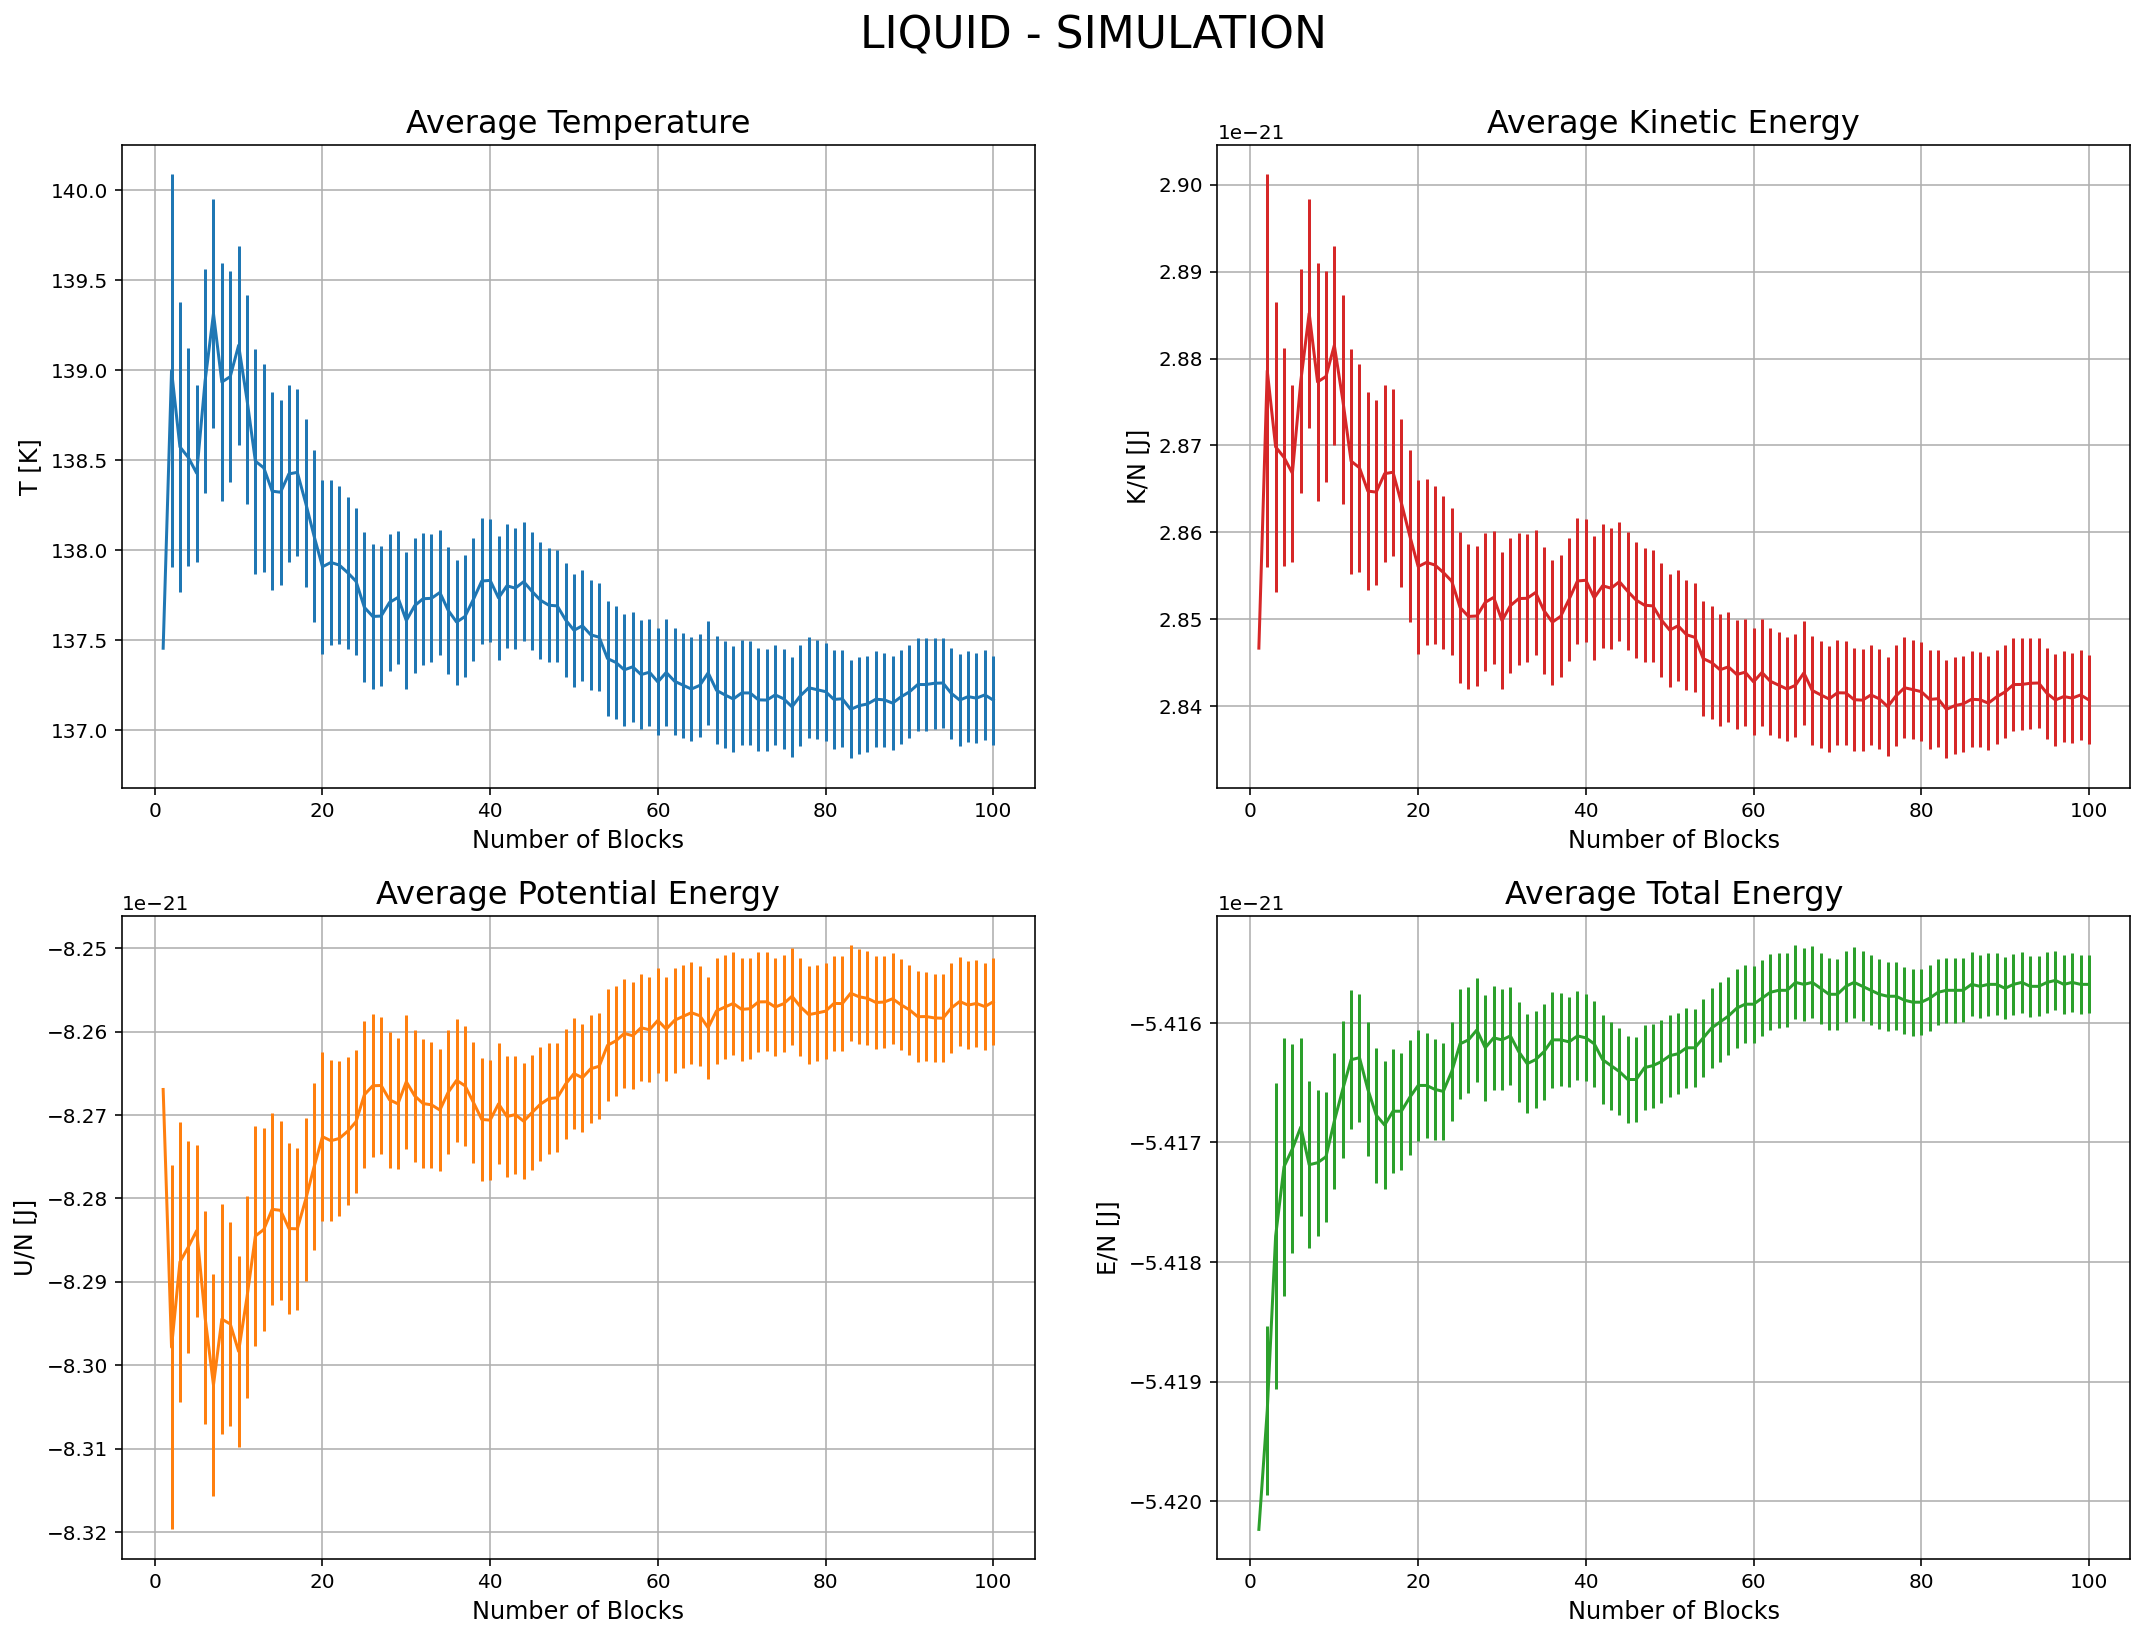

In [6]:
liquid_ave_temp, liquid_err_temp = np.loadtxt("MD/liquid_ave/ave_temp.out", usecols = (1,2), delimiter=' ', unpack ='true')*e_kb
liquid_ave_ekin, liquid_err_ekin = np.loadtxt("MD/liquid_ave/ave_ekin.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
liquid_ave_epot, liquid_err_epot = np.loadtxt("MD/liquid_ave/ave_epot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
liquid_ave_etot, liquid_err_etot = np.loadtxt("MD/liquid_ave/ave_etot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e

block = np.loadtxt("MD/liquid_ave/ave_temp.out", usecols = (0))

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f'LIQUID - SIMULATION', fontsize=22, y=0.95)
ax = ax.reshape(-1)

ave_list = [liquid_ave_temp, liquid_ave_ekin, liquid_ave_epot, liquid_ave_etot]
err_list = [liquid_err_temp, liquid_err_ekin, liquid_err_epot, liquid_err_etot]
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
title_list = ['Average Temperature', 'Average Kinetic Energy', 'Average Potential Energy', 'Average Total Energy']
N_list = ['T [K]', 'K/N [J]', 'U/N [J]', 'E/N [J]']

for i in range(4):
    ax[i].errorbar(block, ave_list[i], yerr=err_list[i], color=color_list[i], ecolor=color_list[i])
    ax[i].set_xlabel(r'Number of Blocks', fontsize=12)
    ax[i].set_ylabel(f'{N_list[i]}', fontsize=12)
    ax[i].set_title(f'{title_list[i]}', fontsize=16)
    ax[i].grid(True)

plt.show()

Nella fase liquida l'energia totale è ancora negativa: stiamo ancora simulando uno stato legato, più debole dello stato solido. Osserviamo inoltre che le proprietà termodinamiche presentano un andamento meno stabile ed una convergenza più lenta rispetto alla fase solida: la fase di fluttuazione iniziale è più lunga e la convergenza inizia all'incirca dal blocco $70$. Per questo è stata effettuta una seconda simulazione mantenendo fisso il numero di blocchi, ma eseguendo $10^6$ passi di integrazioni, in modo da aumentare di un fattore $10$ le misure in ogni blocco. Di seguito riportiamo i risultati ottenuti da questa seconda simulazione.

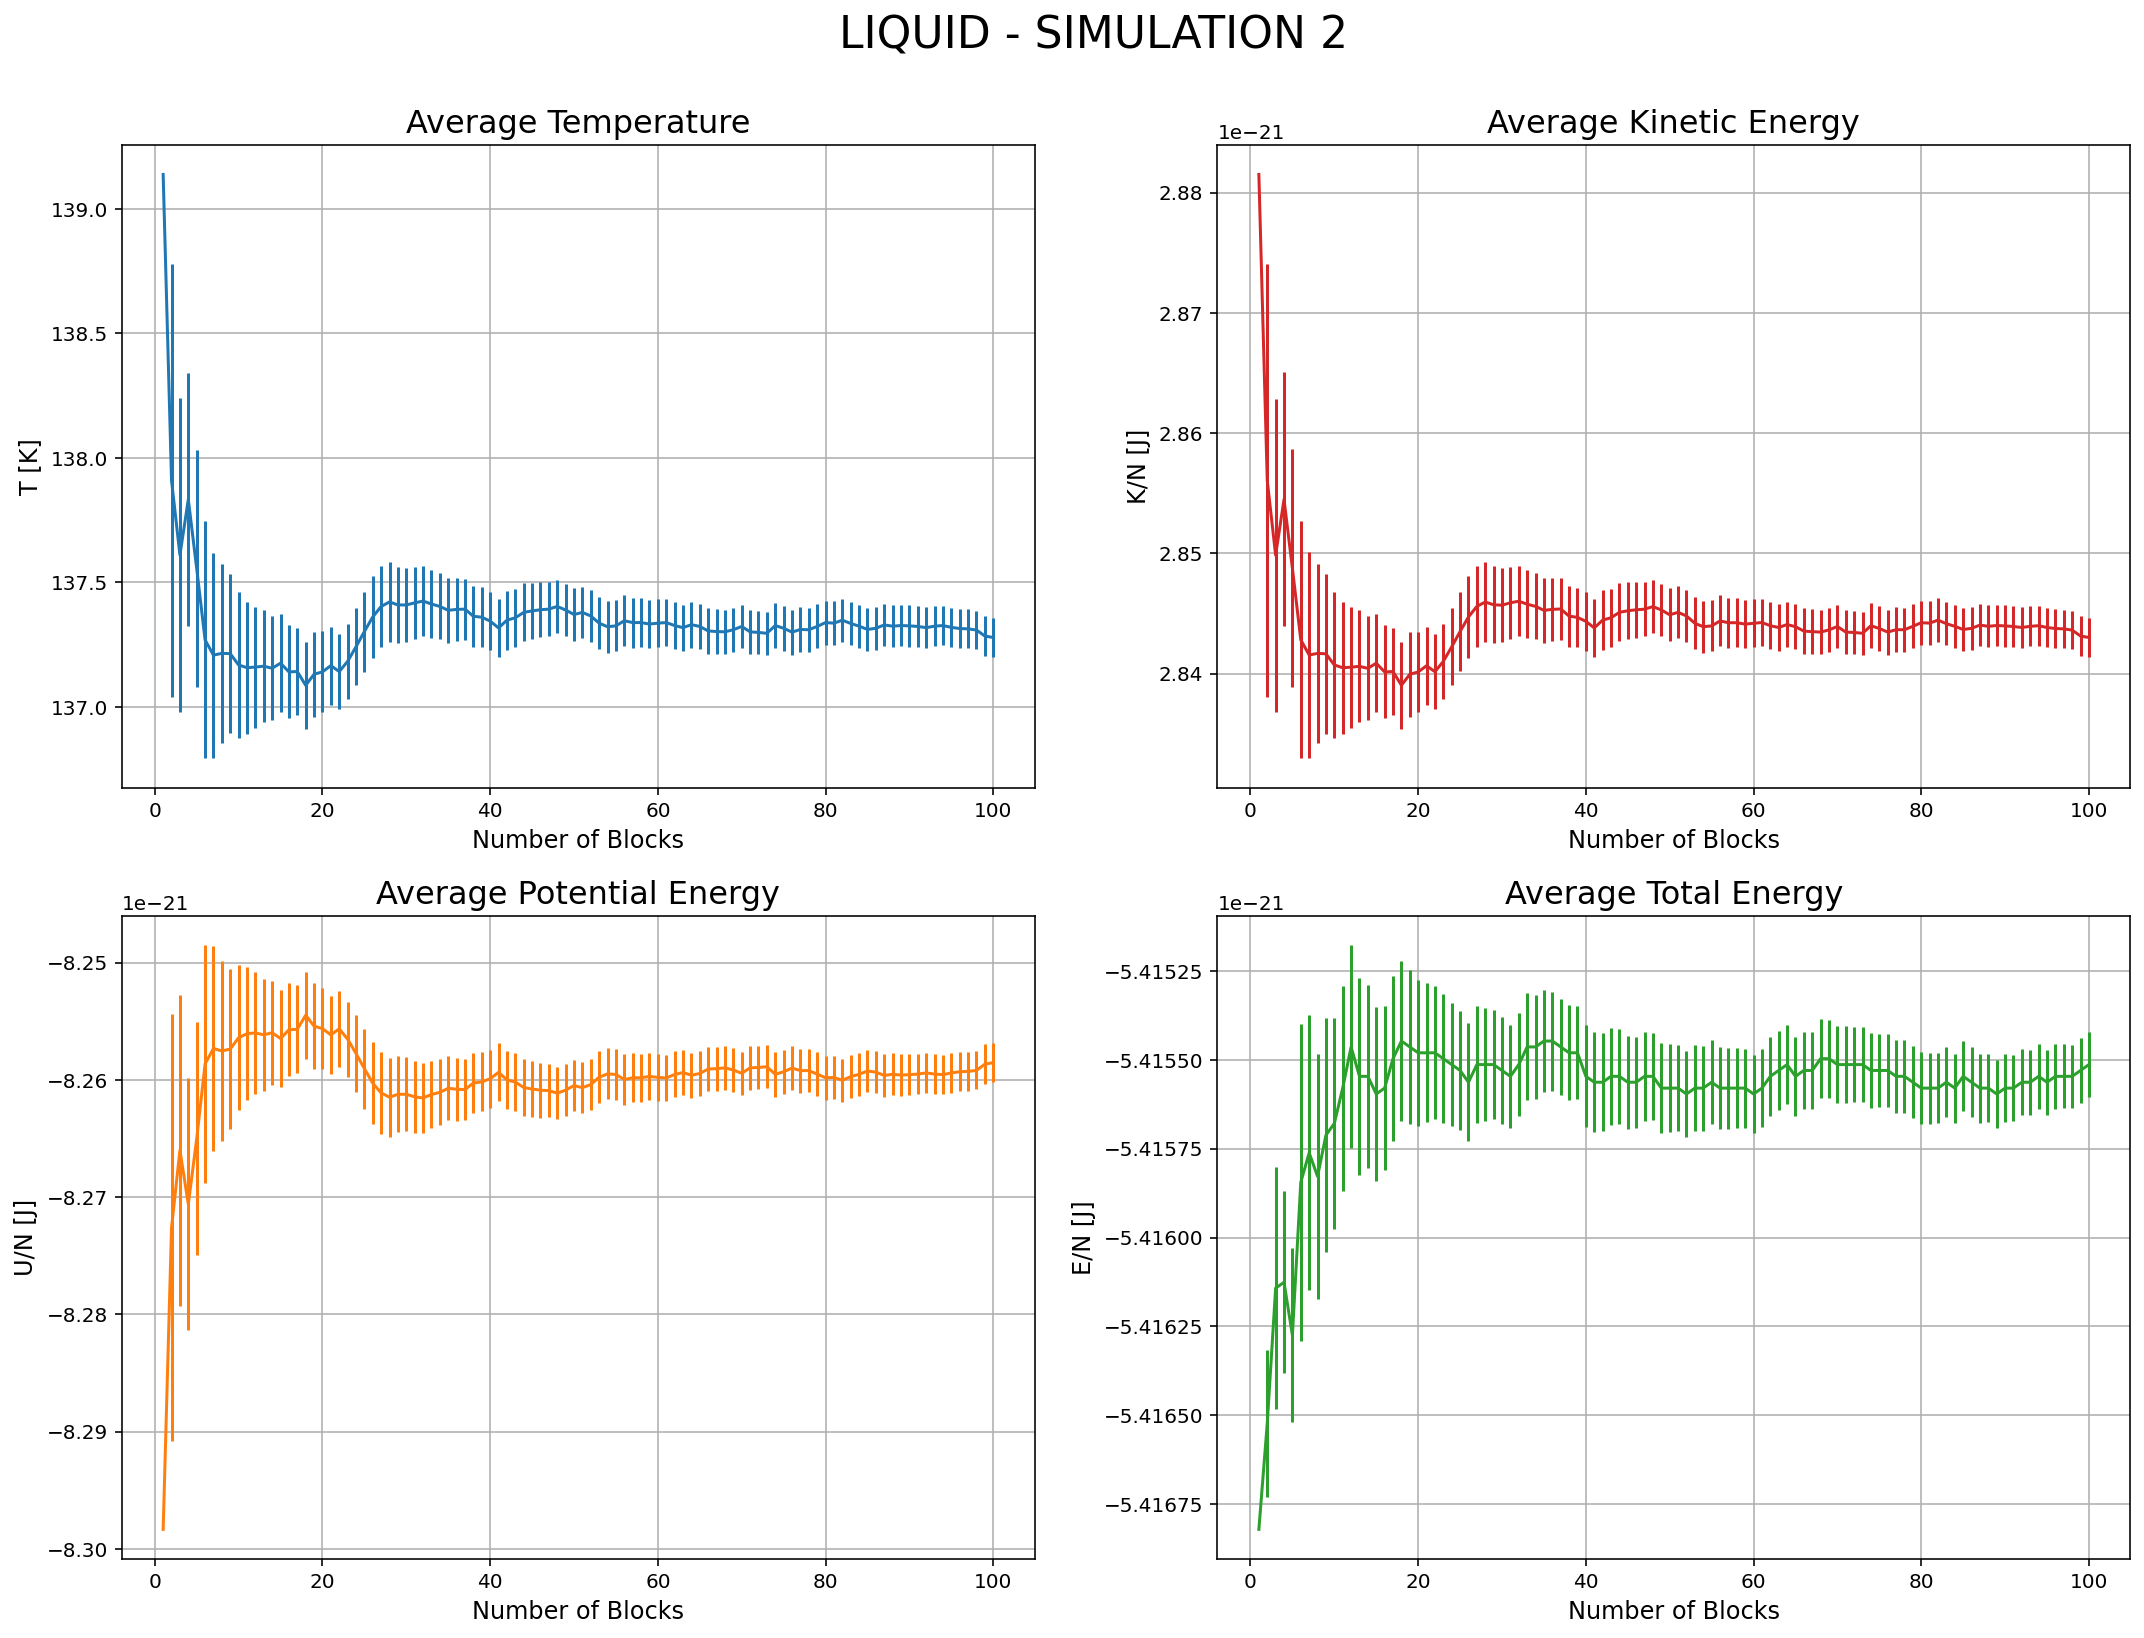

In [7]:
liquid_ave_temp, liquid_err_temp = np.loadtxt("MD/liquid_ave_2/ave_temp.out", usecols = (1,2), delimiter=' ', unpack ='true')*e_kb
liquid_ave_ekin, liquid_err_ekin = np.loadtxt("MD/liquid_ave_2/ave_ekin.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
liquid_ave_epot, liquid_err_epot = np.loadtxt("MD/liquid_ave_2/ave_epot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
liquid_ave_etot, liquid_err_etot = np.loadtxt("MD/liquid_ave_2/ave_etot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
liquid_temp = np.loadtxt("MD/liquid_ave/output_temp.dat")


block = np.loadtxt("MD/liquid_ave_2/ave_temp.out", usecols = (0))

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f'LIQUID - SIMULATION 2', fontsize=22, y=0.95)
ax = ax.reshape(-1)

ave_list = [liquid_ave_temp, liquid_ave_ekin, liquid_ave_epot, liquid_ave_etot]
err_list = [liquid_err_temp, liquid_err_ekin, liquid_err_epot, liquid_err_etot]
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
title_list = ['Average Temperature', 'Average Kinetic Energy', 'Average Potential Energy', 'Average Total Energy']
N_list = ['T [K]', 'K/N [J]', 'U/N [J]', 'E/N [J]']

for i in range(4):
    ax[i].errorbar(block, ave_list[i], yerr=err_list[i], color=color_list[i], ecolor=color_list[i])
    ax[i].set_xlabel(r'Number of Blocks', fontsize=12)
    ax[i].set_ylabel(f'{N_list[i]}', fontsize=12)
    ax[i].set_title(f'{title_list[i]}', fontsize=16)
    ax[i].grid(True)

plt.show()

Ora l'andamento delle quantità misurate al crescere del numero dei blocchi si stabilizza attorno a un valore medio.

<b>Fase gassosa</b>

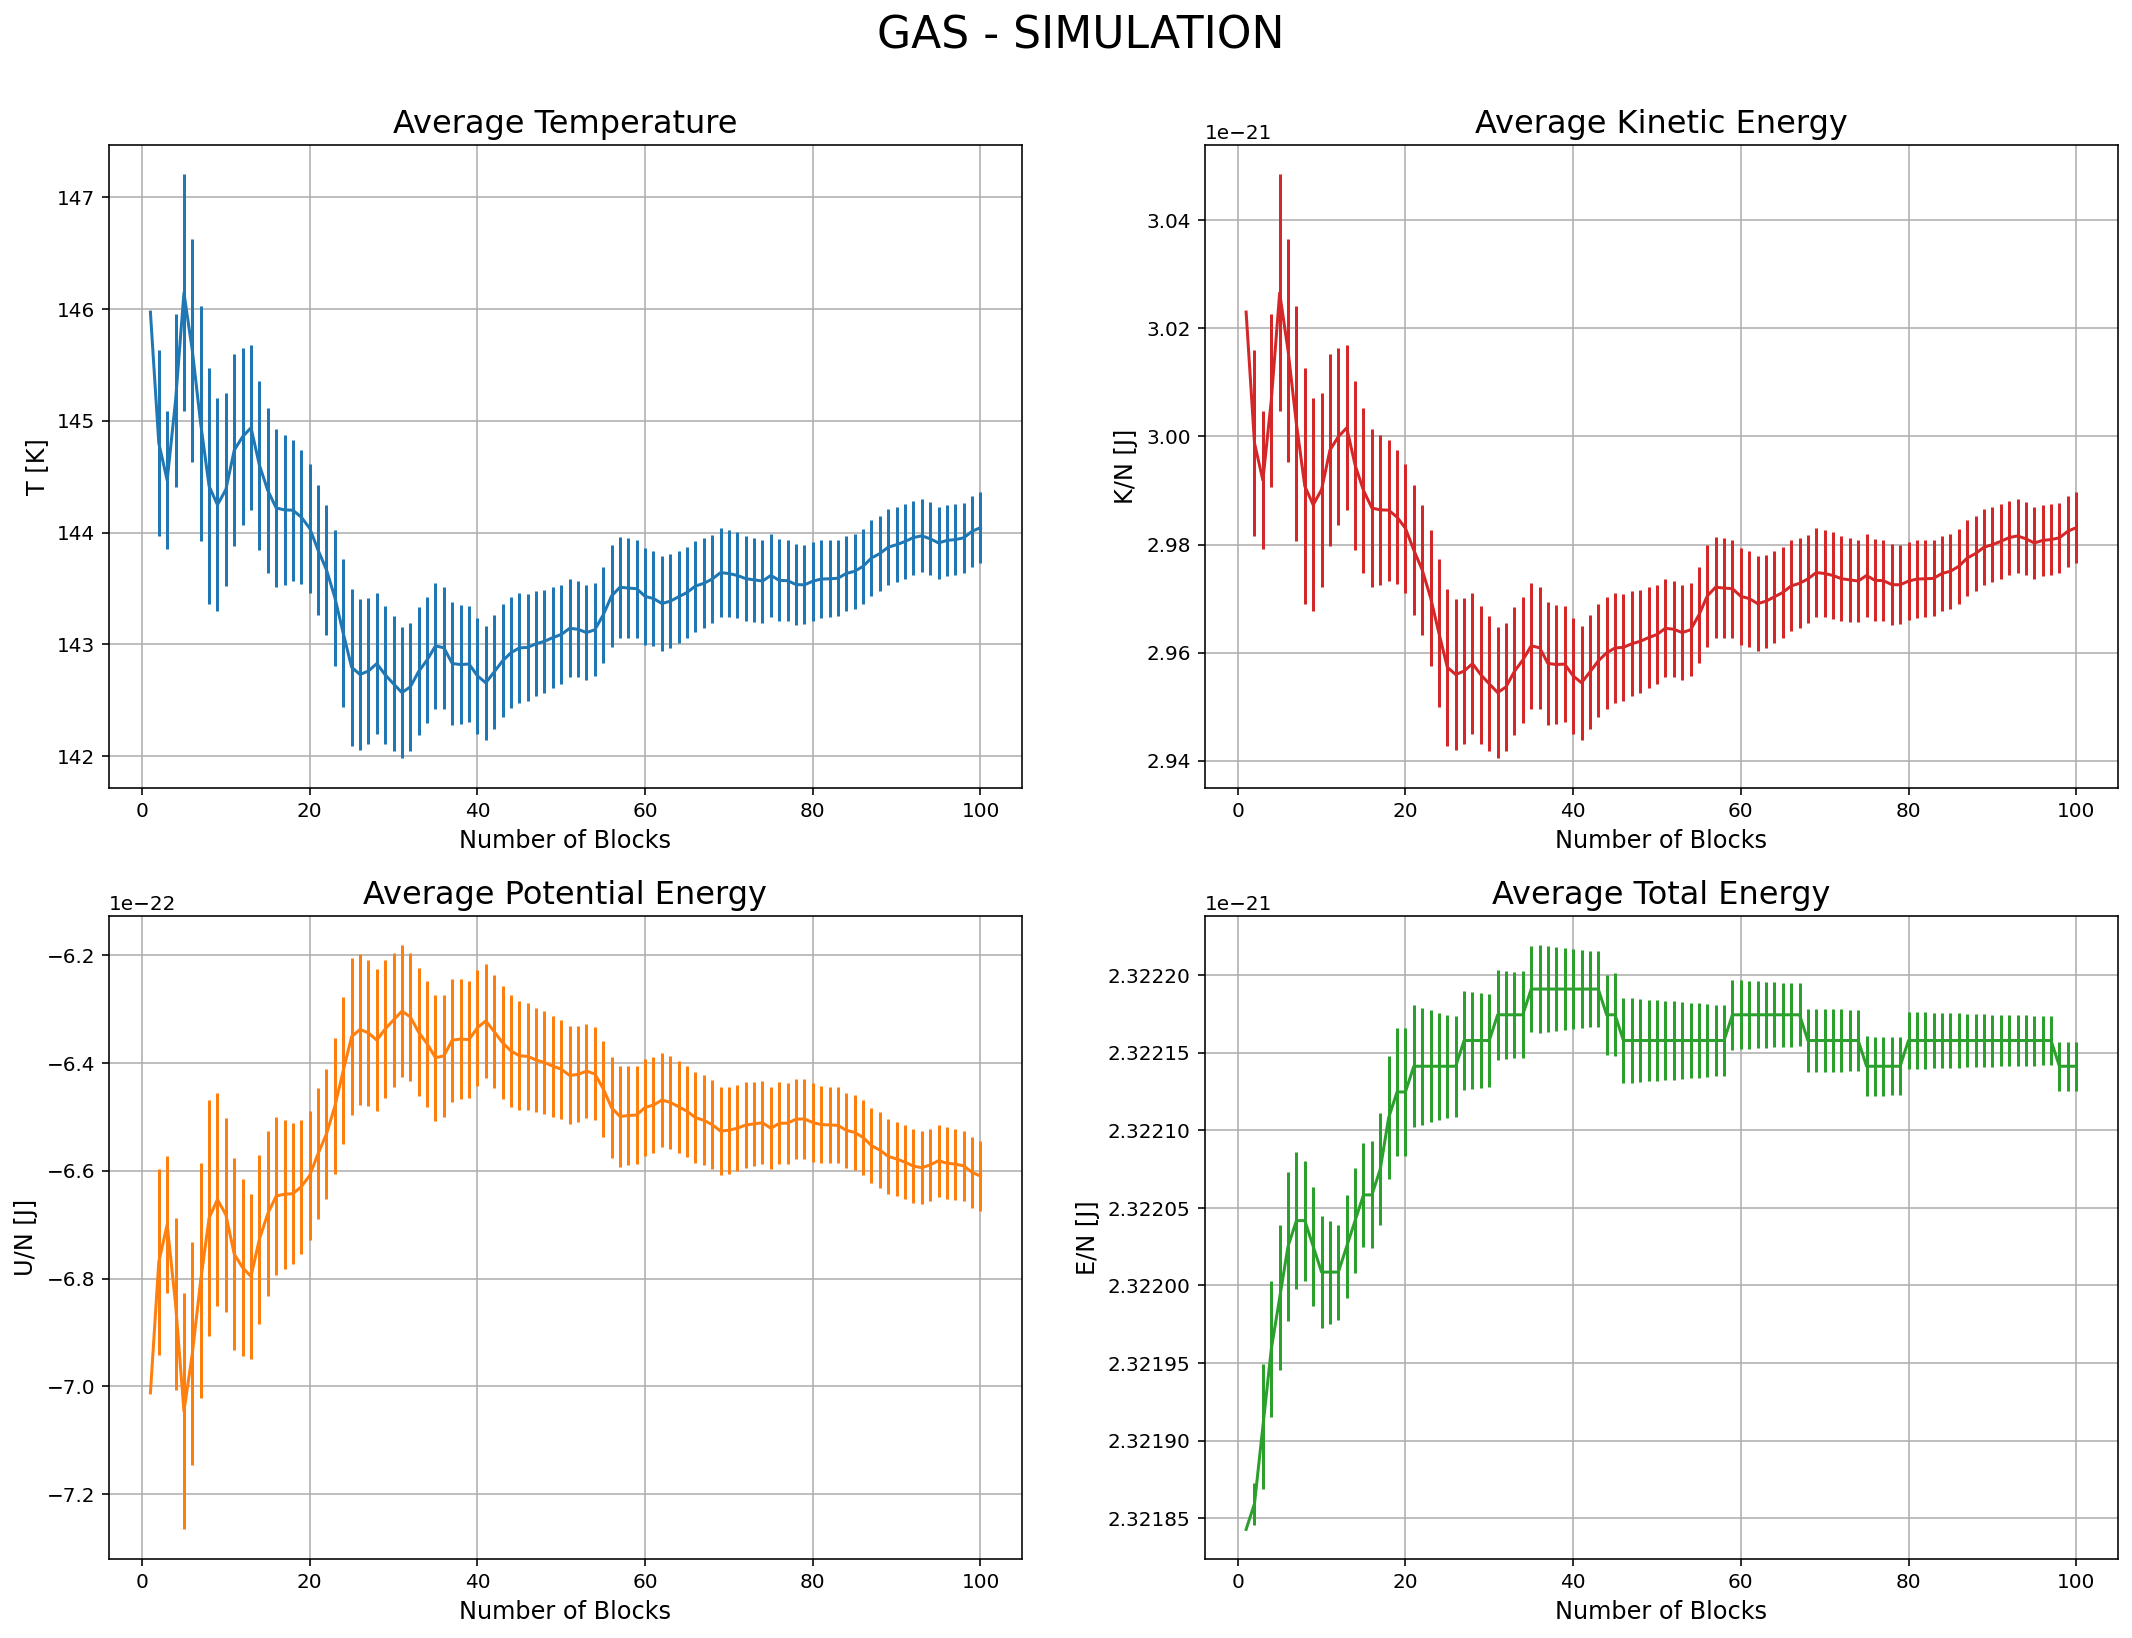

In [8]:
gas_ave_temp, gas_err_temp = np.loadtxt("MD/gas_ave/ave_temp.out", usecols = (1,2), delimiter=' ', unpack ='true')*e_kb
gas_ave_ekin, gas_err_ekin = np.loadtxt("MD/gas_ave/ave_ekin.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
gas_ave_epot, gas_err_epot = np.loadtxt("MD/gas_ave/ave_epot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
gas_ave_etot, gas_err_etot = np.loadtxt("MD/gas_ave/ave_etot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e

block = np.loadtxt("MD/gas_ave/ave_temp.out", usecols = (0))

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f'GAS - SIMULATION', fontsize=22, y=0.95)
ax = ax.reshape(-1)

ave_list = [gas_ave_temp, gas_ave_ekin, gas_ave_epot, gas_ave_etot]
err_list = [gas_err_temp, gas_err_ekin, gas_err_epot, gas_err_etot]
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
title_list = ['Average Temperature', 'Average Kinetic Energy', 'Average Potential Energy', 'Average Total Energy']
N_list = ['T [K]', 'K/N [J]', 'U/N [J]', 'E/N [J]']

for i in range(4):
    ax[i].errorbar(block, ave_list[i], yerr=err_list[i], color=color_list[i], ecolor=color_list[i])
    ax[i].set_xlabel(r'Number of Blocks', fontsize=12)
    ax[i].set_ylabel(f'{N_list[i]}', fontsize=12)
    ax[i].set_title(f'{title_list[i]}', fontsize=16)
    ax[i].grid(True)

plt.show()

Nella fase gassosa l'energia totale è positiva: si tratta infatti di uno stato non legato, in cui il termine cinetico domina sulle interazioni tra le particelle. L'andamento a salti dell'energia totale è dovuto alle poche cifre decimali salvate nel file di output. In questa fase le proprietà termodinamiche non sembrano convergere verso un valore ben definito come accadeva per le due fasi precedenti. <br>
Come nel caso liquido, si è quindi effettuata una seconda simulazione con lo stesso numero di blocchi, ma con $10^6$ passi integrazione. Di seguito sono riportati i risultati ottenuti.

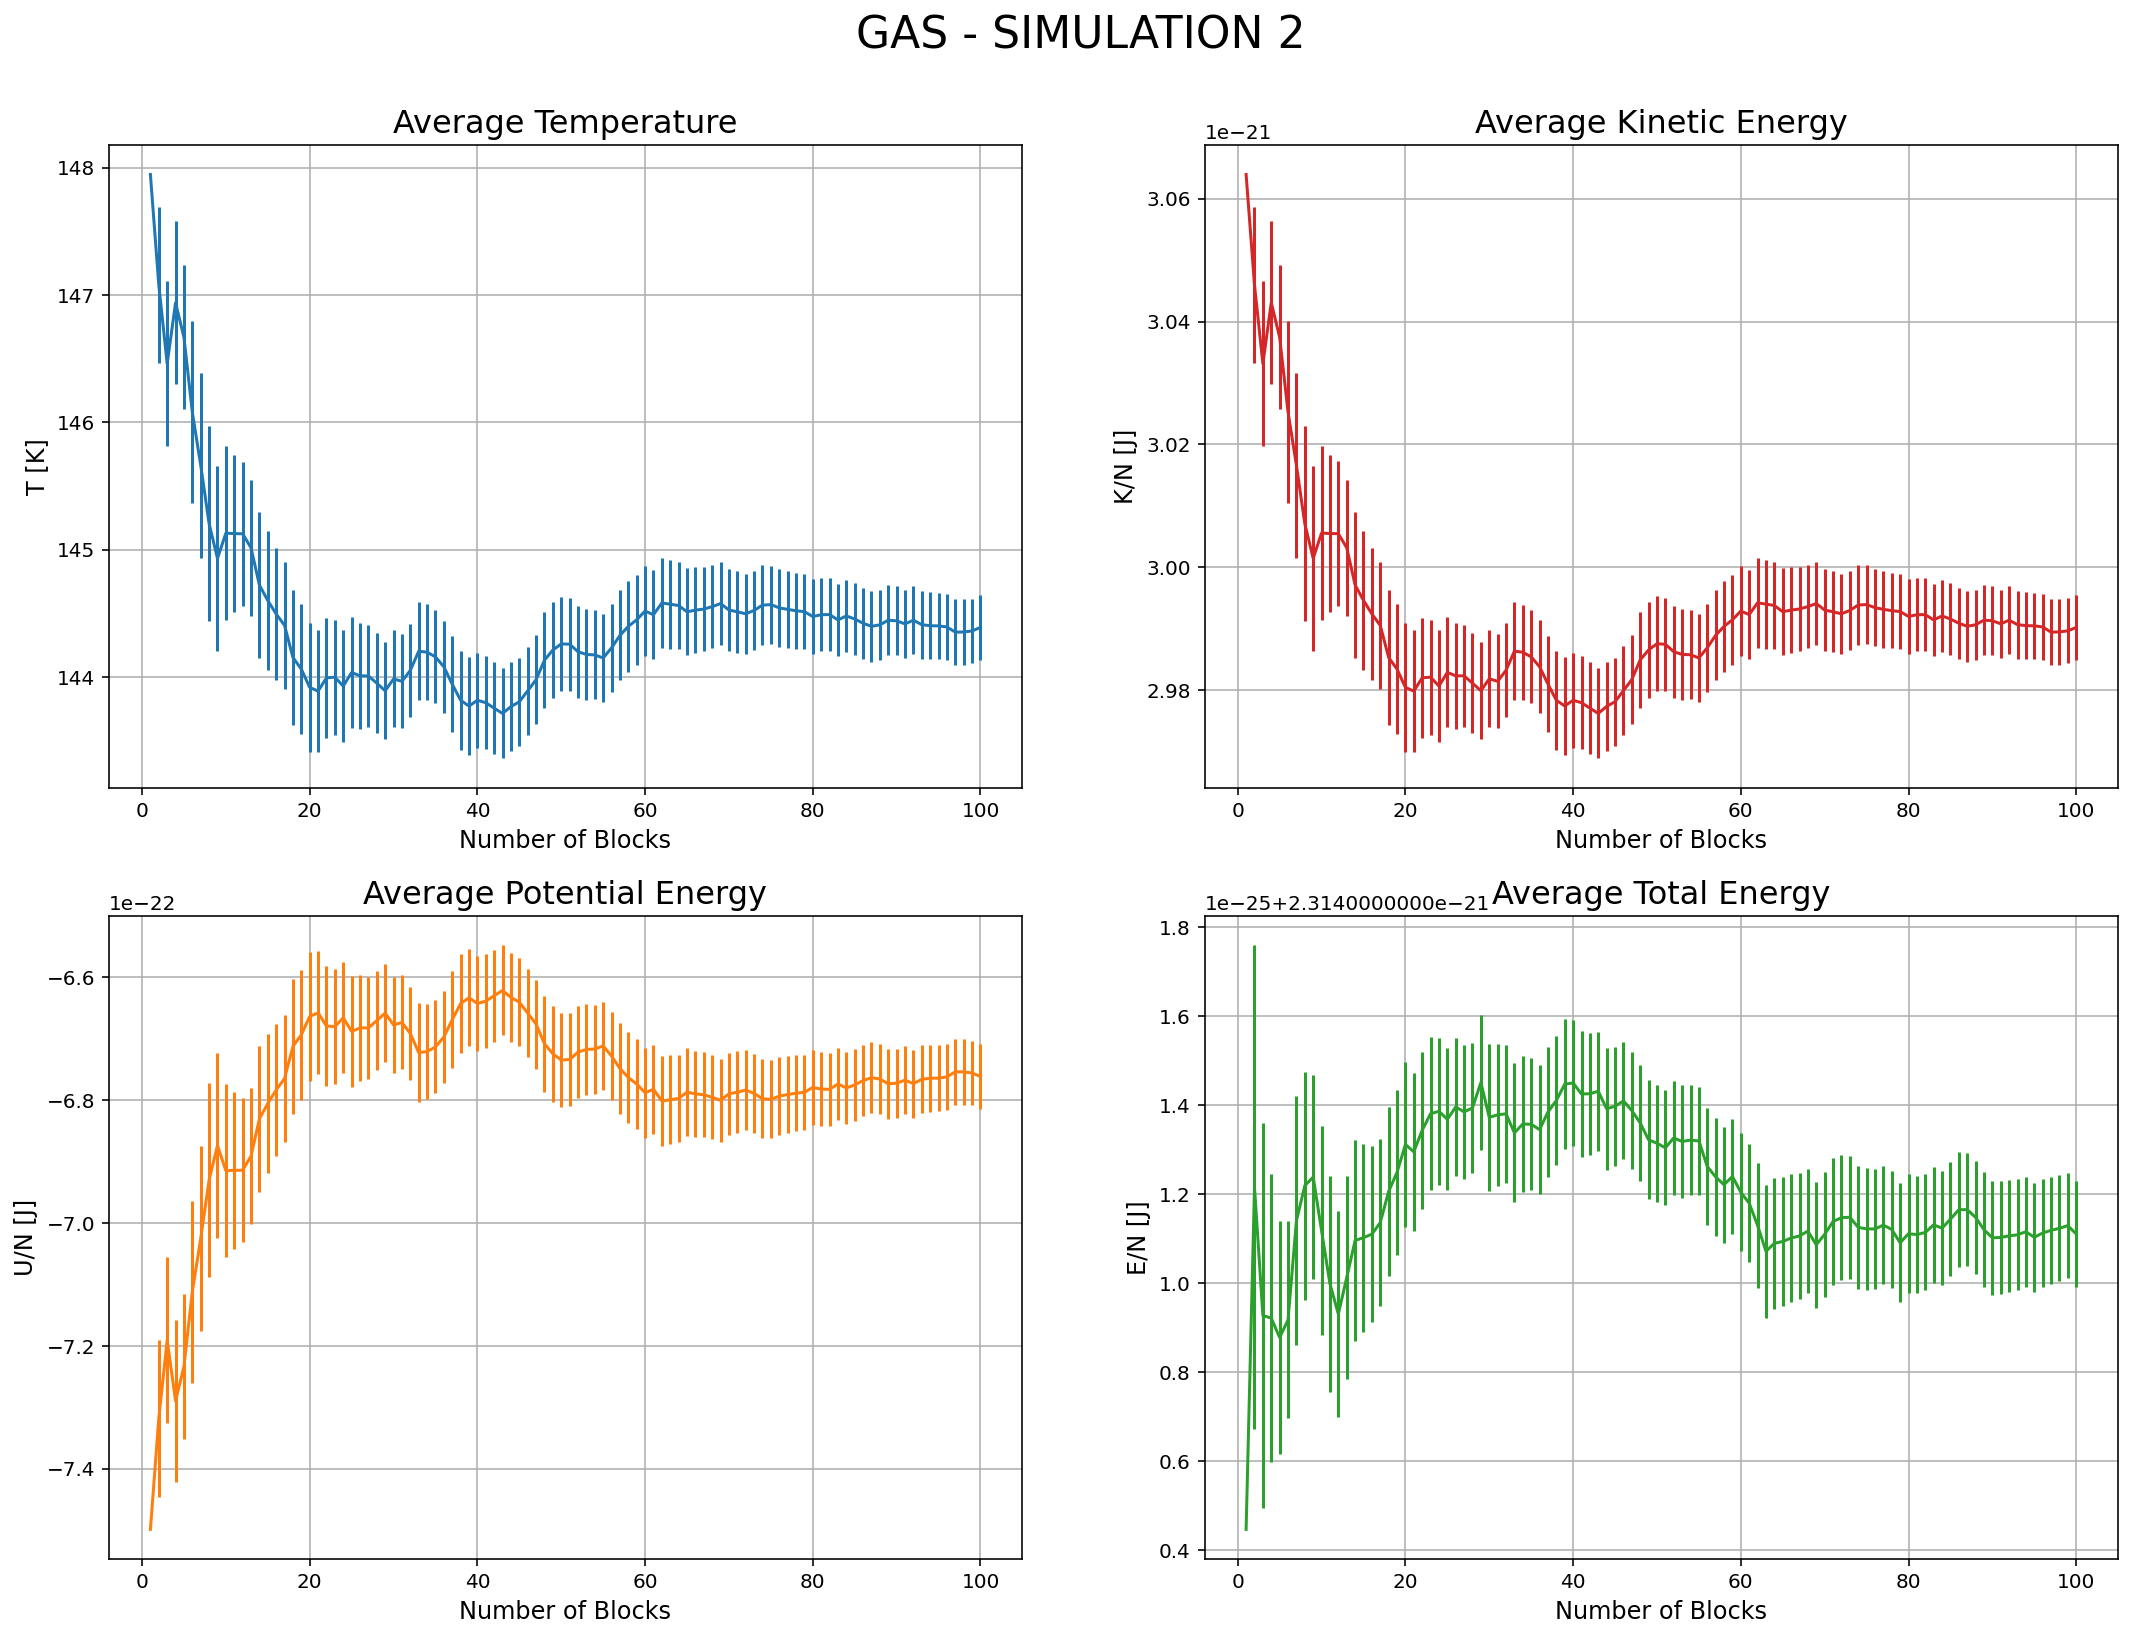

In [9]:
gas_ave_temp, gas_err_temp = np.loadtxt("MD/gas_ave_2/ave_temp.out", usecols = (1,2), delimiter=' ', unpack ='true')*e_kb
gas_ave_ekin, gas_err_ekin = np.loadtxt("MD/gas_ave_2/ave_ekin.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
gas_ave_epot, gas_err_epot = np.loadtxt("MD/gas_ave_2/ave_epot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e
gas_ave_etot, gas_err_etot = np.loadtxt("MD/gas_ave_2/ave_etot.out", usecols = (1,2), delimiter=' ', unpack ='true')*e

block = np.loadtxt("MD/gas_ave/ave_temp.out", usecols = (0))

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
fig.suptitle(f'GAS - SIMULATION 2', fontsize=22, y=0.95)
ax = ax.reshape(-1)

ave_list = [gas_ave_temp, gas_ave_ekin, gas_ave_epot, gas_ave_etot]
err_list = [gas_err_temp, gas_err_ekin, gas_err_epot, gas_err_etot]
color_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
title_list = ['Average Temperature', 'Average Kinetic Energy', 'Average Potential Energy', 'Average Total Energy']
N_list = ['T [K]', 'K/N [J]', 'U/N [J]', 'E/N [J]']

for i in range(4):
    ax[i].errorbar(block, ave_list[i], yerr=err_list[i], color=color_list[i], ecolor=color_list[i])
    ax[i].set_xlabel(r'Number of Blocks', fontsize=12)
    ax[i].set_ylabel(f'{N_list[i]}', fontsize=12)
    ax[i].set_title(f'{title_list[i]}', fontsize=16)
    ax[i].grid(True)

plt.show()

I valoti medi delle quantità misurate iniziano a convergere a partire dal blocco $60$. Per osservare una convergenza più netta è necessario aumentare ulteriormente il numero di misure in ogni blocco.